In [1]:
import netCDF4 as nc

In [2]:
from netCDF4 import Dataset

In [3]:
import matplotlib.pyplot as plt

In [4]:
import cartopy.crs as ccrs

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [5]:
import matplotlib as mpl

In [6]:
import numpy as np

In [7]:
from scipy.io import netcdf

In [8]:
import xarray as xr #ideal for 3D data, unlike Pandas

In [9]:
Dataset=(r'/Users/chiaraciscato/Desktop/geomar/FOCI data/CO2flux_CDR_EU_coast_ssp126_1m.nc')

In [10]:
data = xr.open_dataset(Dataset)

In [38]:
print(data)

<xarray.Dataset>
Dimensions:            (time_counter: 1020, y: 511, x: 722, bnds: 2)
Coordinates:
    nav_lat            (y, x) float32 -77.01 -77.01 -77.01 ... 50.07 50.0 50.0
    nav_lon            (y, x) float32 72.75 73.25 73.75 ... 73.01 73.0 73.0
  * time_counter       (time_counter) datetime64[ns] 2015-01-16T12:00:00 ... ...
Dimensions without coordinates: y, x, bnds
Data variables:
    co2flux_cpl        (time_counter, y, x) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    time_counter_bnds  (time_counter, bnds) datetime64[ns] 2015-01-01 ... 210...
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.5
    history:      Tue Jun 21 11:57:51 2022: ncks -L 1 -7 CO2flux_CDR_EU_coast...
    name:         FOCI2.0-TK201_FMESM_SSP126_alkEU_2014CC105_1m_20150101_2015...
    description:  diagnostics 2d bio
    title:        diagnostics 2d bio
    production:   An IPSL model
    timeStamp:    2022-Jun-10 10:48:19 CEST
    NCO:       

In [12]:
data.variables.keys() 

KeysView(Frozen({'co2flux_cpl': <xarray.Variable (time_counter: 1020, y: 511, x: 722)>
[376320840 values with dtype=float64]
Attributes:
    long_name:           co2 flux calc in ECHAM
    units:               kg/m2/sec
    online_operation:    average
    interval_operation:  2160 s
    interval_write:      1 month
    cell_methods:        time: mean (interval: 2160 s), 'nav_lat': <xarray.Variable (y: 511, x: 722)>
[368942 values with dtype=float32]
Attributes:
    standard_name:        latitude
    long_name:            Latitude
    units:                degrees_north
    _CoordinateAxisType:  Lat, 'nav_lon': <xarray.Variable (y: 511, x: 722)>
[368942 values with dtype=float32]
Attributes:
    standard_name:        longitude
    long_name:            Longitude
    units:                degrees_east
    _CoordinateAxisType:  Lon, 'time_counter': <xarray.IndexVariable 'time_counter' (time_counter: 1020)>
array(['2015-01-16T12:00:00.000000000', '2015-02-15T00:00:00.000000000',
       '2

In [13]:
lats = data.variables['nav_lat'][:]
lons = data.variables['nav_lon'][:]
time = data.variables['time_counter'][:]
co2flux = data.variables['co2flux_cpl'][:].squeeze()
print(co2flux.shape)

(1020, 511, 722)


In [14]:
DS_date = data.sel(time_counter='2015-01-17') #select one timestep
DS_date

<xarray.Dataset>
Dimensions:            (time_counter: 0, y: 511, x: 722, bnds: 2)
Coordinates:
    nav_lat            (y, x) float32 ...
    nav_lon            (y, x) float32 ...
  * time_counter       (time_counter) datetime64[ns] 
Dimensions without coordinates: y, x, bnds
Data variables:
    co2flux_cpl        (time_counter, y, x) float64 ...
    time_counter_bnds  (time_counter, bnds) datetime64[ns] 
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.5
    history:      Tue Jun 21 11:57:51 2022: ncks -L 1 -7 CO2flux_CDR_EU_coast...
    name:         FOCI2.0-TK201_FMESM_SSP126_alkEU_2014CC105_1m_20150101_2015...
    description:  diagnostics 2d bio
    title:        diagnostics 2d bio
    production:   An IPSL model
    timeStamp:    2022-Jun-10 10:48:19 CEST
    NCO:          netCDF Operators version 4.9.1 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [15]:
DS_date_range = data.sel(time_counter=slice('2080', '2090')) # select a time range (from ... to ..., included)
DS_date_range 

<xarray.Dataset>
Dimensions:            (time_counter: 132, y: 511, x: 722, bnds: 2)
Coordinates:
    nav_lat            (y, x) float32 ...
    nav_lon            (y, x) float32 ...
  * time_counter       (time_counter) datetime64[ns] 2080-01-16T12:00:00 ... ...
Dimensions without coordinates: y, x, bnds
Data variables:
    co2flux_cpl        (time_counter, y, x) float64 ...
    time_counter_bnds  (time_counter, bnds) datetime64[ns] 2080-01-01 ... 209...
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.5
    history:      Tue Jun 21 11:57:51 2022: ncks -L 1 -7 CO2flux_CDR_EU_coast...
    name:         FOCI2.0-TK201_FMESM_SSP126_alkEU_2014CC105_1m_20150101_2015...
    description:  diagnostics 2d bio
    title:        diagnostics 2d bio
    production:   An IPSL model
    timeStamp:    2022-Jun-10 10:48:19 CEST
    NCO:          netCDF Operators version 4.9.1 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [16]:
df = DS_date_range.to_dataframe() # export data as Pandas dataframe 

In [17]:
df.head() # first lines of new dataframe

co2flux_cpl    nav_lat  nav_lon  \
time_counter        y x bnds                                    
2080-01-16 12:00:00 0 0 0             0.0 -77.010475    72.75   
                        1             0.0 -77.010475    72.75   
                      1 0             0.0 -77.010475    73.25   
                        1             0.0 -77.010475    73.25   
                      2 0             0.0 -77.010475    73.75   

                             time_counter_bnds  
time_counter        y x bnds                    
2080-01-16 12:00:00 0 0 0           2080-01-01  
                        1           2080-02-01  
                      1 0           2080-01-01  
                        1           2080-02-01  
                      2 0           2080-01-01

In [18]:
df.describe()

,co2flux_cpl,nav_lat,nav_lon
count,9.740069e+07,9.740069e+07,9.740069e+07
mean,-5.023449e-10,5.172920e-01,-1.020401e+00
std,2.492622e-09,5.207631e+01,1.025694e+02
min,-5.444014e-08,-7.701048e+01,-1.799970e+02
25%,-1.316354e-09,-5.194667e+01,-9.518312e+01
50%,0.000000e+00,2.998630e+00,2.482575e+00
75%,1.842538e-10,5.047917e+01,8.425000e+01
max,4.569791e-08,8.988536e+01,1.799988e+02


In [19]:
DS_date_range.co2flux_cpl.mean(dim=('y', 'x')) # time_counter as x months for the selected timeframe

<xarray.DataArray 'co2flux_cpl' (time_counter: 132)>
array([-1.34844869e-09, -1.27501848e-09, -1.12494646e-09, -7.93303262e-10,
       -5.42245216e-10, -2.47081514e-10,  2.30759203e-11,  1.82300018e-10,
        8.13713624e-11, -3.43189064e-10, -1.07795523e-09, -1.40077186e-09,
       -1.39937648e-09, -1.24619477e-09, -1.05965470e-09, -7.80852328e-10,
       -5.53514293e-10, -2.36183451e-10,  3.40318412e-11,  2.23405258e-10,
        9.23256741e-11, -2.19576906e-10, -8.84947750e-10, -1.32870894e-09,
       -1.27962393e-09, -1.24643757e-09, -1.03738777e-09, -7.10936450e-10,
       -3.89066018e-10, -2.31467897e-10,  6.66475598e-11,  2.24087424e-10,
        9.66086610e-11, -2.04543285e-10, -9.02758807e-10, -1.25265177e-09,
       -1.29306242e-09, -1.29987788e-09, -1.00542312e-09, -7.62433250e-10,
       -4.90216548e-10, -2.53900216e-10,  1.02577163e-10,  2.10086457e-10,
        1.26046158e-10, -2.52692634e-10, -8.78883379e-10, -1.28956649e-09,
       -1.22544188e-09, -1.13067845e-09, -9.81286741e-10, -6.89303454e-10,
       -4.63729258e-10, -1.50456013e-10,  1.05194920e-10,  2.81920110e-10,
        3.26610120e-10, -8.01843967e-11, -8.03440492e-10, -1.10832359e-09,
       -1.15952322e-09, -1.06061575e-09, -9.80514107e-10, -6.53577209e-10,
       -4.32021230e-10, -1.16067401e-10,  1.73477346e-10,  2.93405191e-10,
        3.09930082e-10, -1.07427276e-10, -7.10812659e-10, -1.07837176e-09,
       -1.22044641e-09, -1.08589945e-09, -1.01116314e-09, -6.79447402e-10,
       -3.60385670e-10, -1.77294337e-10,  1.89233604e-10,  3.41206025e-10,
        2.73487342e-10, -7.95346378e-12, -6.65565296e-10, -1.08273279e-09,
       -1.15866378e-09, -1.08569479e-09, -9.86612901e-10, -6.82798554e-10,
       -4.34287949e-10, -4.37895981e-11,  3.40213386e-10,  5.80822767e-10,
        3.89967373e-10,  8.31072204e-11, -6.75088850e-10, -1.12630867e-09,
       -1.15614383e-09, -1.12072713e-09, -8.64950489e-10, -5.88965498e-10,
       -4.43725867e-10, -1.02273038e-10,  2.07649422e-10,  4.64256277e-10,
        4.50787790e-10, -3.39092939e-11, -7.37487206e-10, -1.12281415e-09,
       -1.20888995e-09, -1.04184660e-09, -8.53676002e-10, -5.79327794e-10,
       -4.50941929e-10, -1.53538843e-10,  2.79802137e-10,  4.04876970e-10,
        4.19267497e-10, -3.38945224e-11, -7.08870337e-10, -1.22115764e-09,
       -1.20204023e-09, -1.05842319e-09, -9.49695983e-10, -6.16181521e-10,
       -3.99297866e-10, -5.59252340e-11,  1.74169097e-10,  4.03052474e-10,
        4.08555372e-10, -5.81264085e-12, -7.19639676e-10, -1.18411759e-09])
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 2080-01-16T12:00:00 ... 2090-...

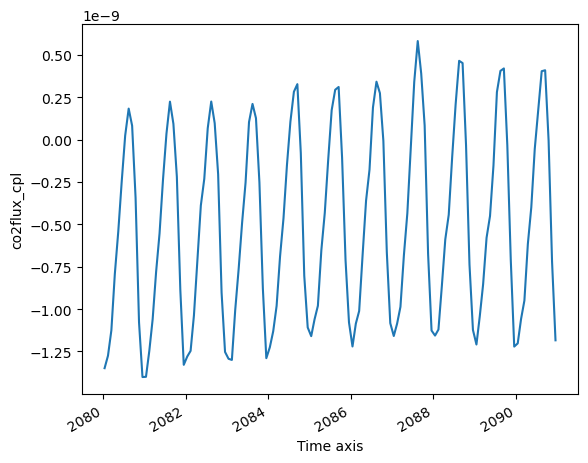

In [20]:
DS_date_range.co2flux_cpl.mean(dim=('y', 'x')).plot() # global mean 

In [21]:
Mean_array = DS_date_range.mean(dim='time_counter') # mean time
Mean_array.values

<bound method Mapping.values of <xarray.Dataset>
Dimensions:      (y: 511, x: 722)
Coordinates:
    nav_lat      (y, x) float32 -77.01 -77.01 -77.01 -77.01 ... 50.07 50.0 50.0
    nav_lon      (y, x) float32 72.75 73.25 73.75 74.25 ... 73.01 73.0 73.0
Dimensions without coordinates: y, x
Data variables:
    co2flux_cpl  (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0>

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


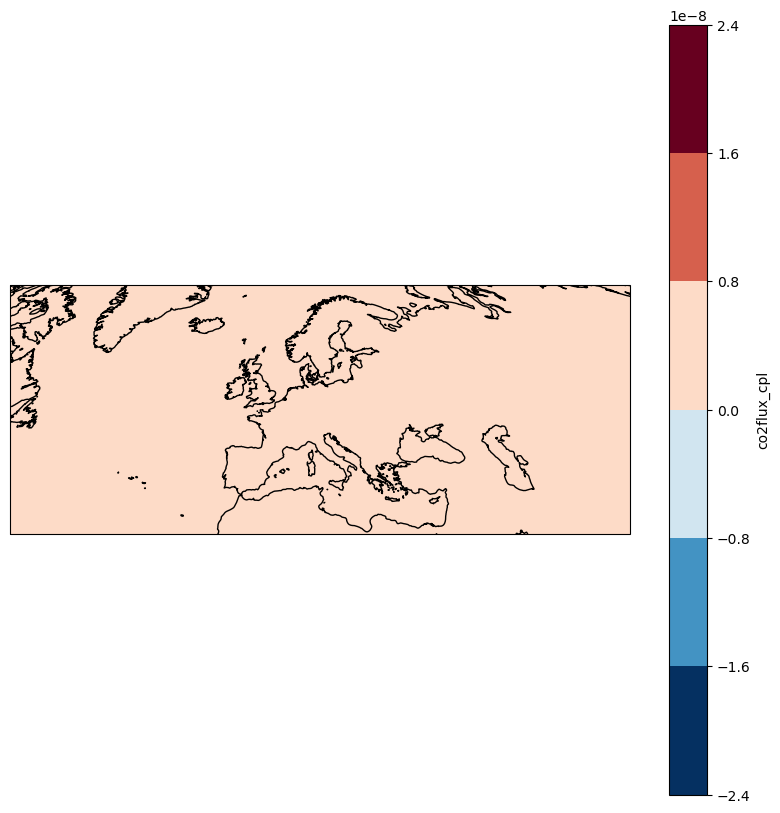

In [37]:
fig=plt.figure(figsize=(10,10), frameon=True) 

ax = plt.axes(projection=ccrs.Mollweide())
Mean_array.co2flux_cpl.plot.contourf(ax=ax, transform=ccrs.PlateCarree());
ax.set_global(); ax.coastlines(); ax.set_extent([70, -50, 30, 60]) # plot a region

In [34]:
DS_date_range = data.sel(time_counter=slice('2080', '2090')) # select a time range
DS_date_range

<xarray.Dataset>
Dimensions:            (time_counter: 132, y: 511, x: 722, bnds: 2)
Coordinates:
    nav_lat            (y, x) float32 -77.01 -77.01 -77.01 ... 50.07 50.0 50.0
    nav_lon            (y, x) float32 72.75 73.25 73.75 ... 73.01 73.0 73.0
  * time_counter       (time_counter) datetime64[ns] 2080-01-16T12:00:00 ... ...
Dimensions without coordinates: y, x, bnds
Data variables:
    co2flux_cpl        (time_counter, y, x) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    time_counter_bnds  (time_counter, bnds) datetime64[ns] 2080-01-01 ... 209...
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.5
    history:      Tue Jun 21 11:57:51 2022: ncks -L 1 -7 CO2flux_CDR_EU_coast...
    name:         FOCI2.0-TK201_FMESM_SSP126_alkEU_2014CC105_1m_20150101_2015...
    description:  diagnostics 2d bio
    title:        diagnostics 2d bio
    production:   An IPSL model
    timeStamp:    2022-Jun-10 10:48:19 CEST
    NCO:          netCDF Operators version 4.9.1 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

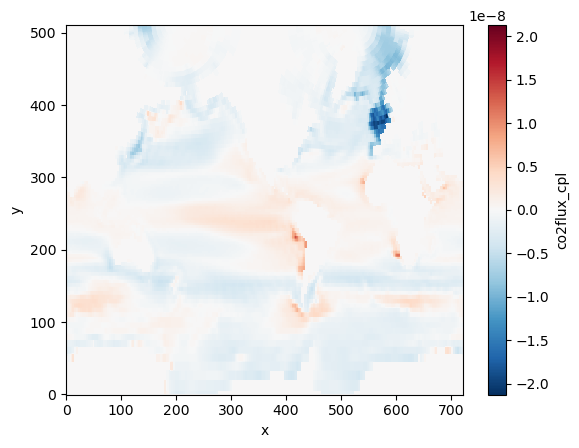

In [24]:
DS_date_range.co2flux_cpl.mean(dim=('time_counter')).plot()

In [25]:
print(co2flux)

<xarray.Variable (time_counter: 1020, y: 511, x: 722)>
[376320840 values with dtype=float64]
Attributes:
    long_name:           co2 flux calc in ECHAM
    units:               kg/m2/sec
    online_operation:    average
    interval_operation:  2160 s
    interval_write:      1 month
    cell_methods:        time: mean (interval: 2160 s)


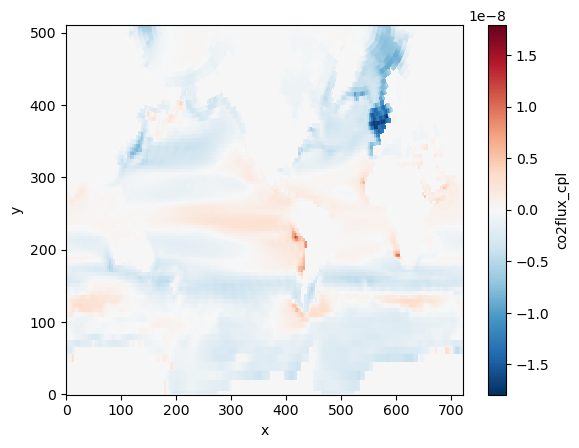

In [26]:
data.co2flux_cpl.mean(dim=('time_counter')).plot()

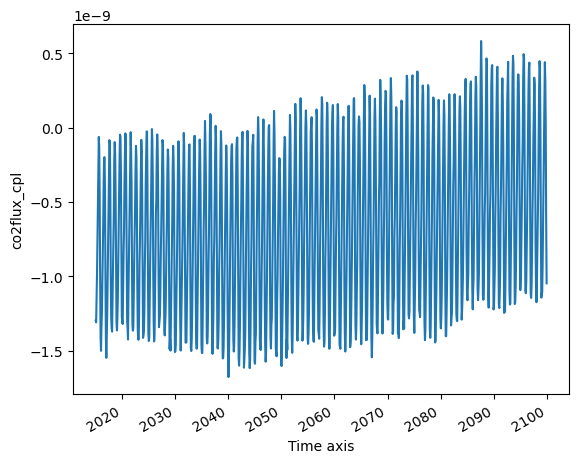

In [30]:
figure = data.co2flux_cpl.mean(dim=('y', 'x')).plot() # global mean with OAE

In [40]:
sliced_data = data.where((-28 < data.nav_lon) & (data.nav_lon < 22) & (36 < data.nav_lat) & (data.nav_lat < 68), drop=True)

# https://stackoverflow.com/questions/41818927/how-to-subset-data-using-multidimensional-coordinates-using-python-xarray

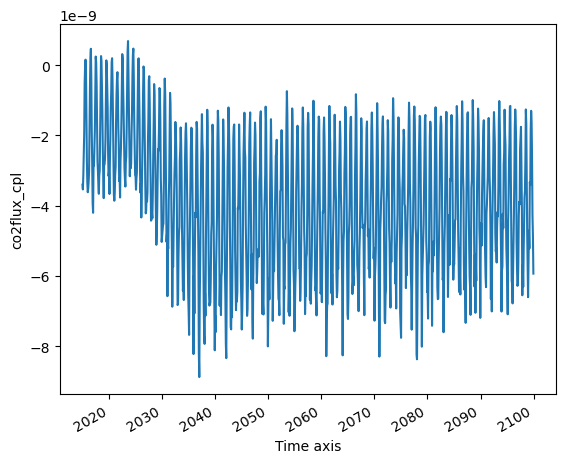

In [41]:
sliced_data.co2flux_cpl.mean(dim=('y', 'x')).plot() # regional mean with OAE